In [0]:
import networkx as nx
import random 
from networkx import *
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from itertools import combinations

# **Redes libres de escala**

Una red libre de escala (scale-free network) es una red compuesta de nodos y enlaces, que tiene la particularidad de que los enlaces están distribuídos de forma muy dispareja. En el mundo real existen muchas gráficas de este estilo y veremos que todas cumplen propiedades muy particulares que las diferencian del resto de gráficas generadas aletariamente.

El nombre "red libre de escala" proviene de que en estos tipos de redes, a menudo se observa que un nodo crece (en términos de enlaces) proporcionalmente al tamaño que tiene, sin que haya un parámetro de escala que lo indique, por ejemplo, que dado un cierto número de enlaces ya no se pueden ganar más enlaces o se deben agregar más lentamente. Otra explicación del nombre proviene de que no existe algo "típico" en esta red. Si bien podemos sacar un promedio, el promedio no sirve para nada porque estas redes tienen elementos con muchísimas relaciones y elementos con muy pocas relaciones, sin que exista una escala característica de la red completa.

# **Ejemplos**

Hay una cantidad enorme de ejemplos de redes libres de escala, éstas son algunas: 

1. La red de amistades entre personas.
2. Las redes del crimen organizado.
3. Las redes de interacción de proteínas en el metabolismo celular.
4. Las redes de caminos, pues la mayoría de los caminos llegan a unas pocas ciudades muy grandes, mientras que de la mayoría de ciudades pequeñas salen unos pocos caminos.

Y muchos otros ejemplos podemos encontrar.

# **Propiedades**



In [0]:
#create a graph with degrees following a power law distribution
#we can eliminate loop to find s  

def crea_grafo(nodes: int):
    
    while True:  
        s=[]
        #nodes = 300
        while len(s) < nodes:
            nextval = int(nx.utils.powerlaw_sequence(1, 2.5)[0]) #n nodes, 
                                                                 #power-law exponent 2.5
            if nextval!= 0:
                s.append(nextval)
        if sum(s) % 2 == 0:
            break
    H = nx.configuration_model(s)                                # Return a random 
                                                                 #graph with the given
                                                                 #degree sequence.
    return H
    


In [0]:
H = crea_grafo(300)

In [0]:
print ("Numero de aristas",len(H.edges()))

Numero de aristas 466


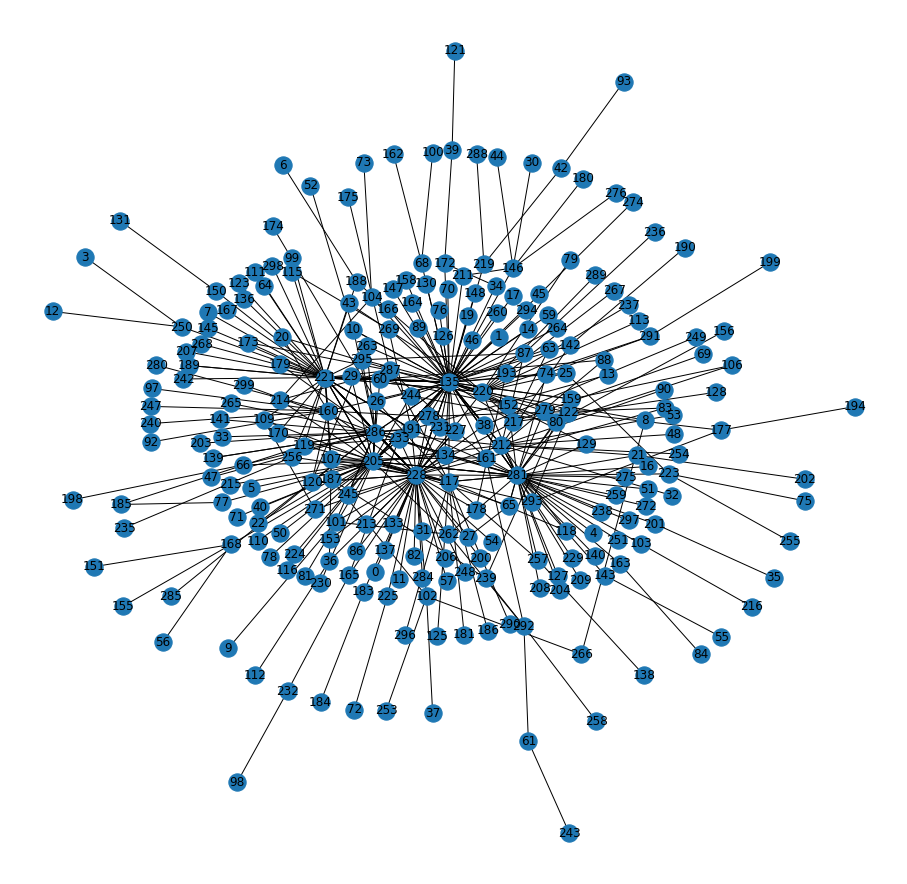

In [0]:
cc = max(nx.connected_components(H), key=len)
H.remove_nodes_from(set(H.nodes) - cc)
#print(cc)
fig, ax = plt.subplots(figsize=(16,16))
nx.draw_kamada_kawai(H, ax=ax, with_labels=True)
fig.show()

In [0]:
print("nodos: ", len(H.nodes))
print("aristas: ", len(H.edges))
print("Distancia media: ", nx.average_shortest_path_length(H))
print("indice de agrupamiento: ", average_clustering(H))
print(nx.is_connected(H))


nodos:  253
aristas:  442
Distancia media:  3.235711148754627
indice de agrupamiento:  0.11104864082216337
True


In [0]:
def estimar_dist_media(G: nx.Graph, k: int=400) -> float:
    
    combinaciones = list(itertools.combinations(G.nodes,2))
    assert len(convinaciones) > k
    muestra = random.choices(combinaciones,k=k)
    distancias = [nx.shortest_path_length(G, cola, punta) 
                  for cola,punta in muestra]
    media = np.mean(distancias)
    stdev = np.std(distancias)
    return media, stdev

In [0]:


def triangles(G, nodes=None):
    """Compute the number of triangles.

    Finds the number of triangles that include a node as one vertex.

    Parameters
    ----------
    G : graph
       A networkx graph
    nodes : container of nodes, optional (default= all nodes in G)
       Compute triangles for nodes in this container.

    Returns
    -------
    out : dictionary
       Number of triangles keyed by node label.

    Examples
    --------
    >>> G=nx.complete_graph(5)
    >>> print(nx.triangles(G,0))
    6
    >>> print(nx.triangles(G))
    {0: 6, 1: 6, 2: 6, 3: 6, 4: 6}
    >>> print(list(nx.triangles(G,(0,1)).values()))
    [6, 6]

    Notes
    -----
    When computing triangles for the entire graph each triangle is counted
    three times, once at each node.  Self loops are ignored.

    """
    # If `nodes` represents a single node in the graph, return only its number
    # of triangles.
    if nodes in G:
        return next(_triangles_and_degree_iter(G, nodes))[2] // 2
    # Otherwise, `nodes` represents an iterable of nodes, so return a
    # dictionary mapping node to number of triangles.
    return {v: t // 2 for v, d, t, _ in _triangles_and_degree_iter(G, nodes)}


def _triangles_and_degree_iter(G, nodes=None):
    """ Return an iterator of (node, degree, triangles, generalized degree).

    This double counts triangles so you may want to divide by 2.
    See degree(), triangles() and generalized_degree() for definitions
    and details.

    """
    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs = ((n, G[n]) for n in G.nbunch_iter(nodes))

    for v, v_nbrs in nodes_nbrs:
        vs = set(v_nbrs) - {v}
        gen_degree = Counter(len(vs & (set(G[w]) - {w})) for w in vs)
        ntriangles = sum(k * val for k, val in gen_degree.items())
        yield (v, len(vs), ntriangles, gen_degree)
        
def average_clustering(G, nodes=None, weight=None, count_zeros=True):
    r"""Compute the average clustering coefficient for the graph G.

    The clustering coefficient for the graph is the average,

    .. math::

       C = \frac{1}{n}\sum_{v \in G} c_v,

    where :math:`n` is the number of nodes in `G`.

    Parameters
    ----------
    G : graph

    nodes : container of nodes, optional (default=all nodes in G)
       Compute average clustering for nodes in this container.

    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used as a weight.
       If None, then each edge has weight 1.

    count_zeros : bool
       If False include only the nodes with nonzero clustering in the average.

    Returns
    -------
    avg : float
       Average clustering

    Examples
    --------
    >>> G=nx.complete_graph(5)
    >>> print(nx.average_clustering(G))
    1.0

    Notes
    -----
    This is a space saving routine; it might be faster
    to use the clustering function to get a list and then take the average.

    Self loops are ignored.

    References
    ----------
    .. [1] Generalizations of the clustering coefficient to weighted
       complex networks by J. Saramäki, M. Kivelä, J.-P. Onnela,
       K. Kaski, and J. Kertész, Physical Review E, 75 027105 (2007).
       http://jponnela.com/web_documents/a9.pdf
    .. [2] Marcus Kaiser,  Mean clustering coefficients: the role of isolated
       nodes and leafs on clustering measures for small-world networks.
       https://arxiv.org/abs/0802.2512
    """
    c = clustering(G, nodes, weight=weight).values()
    if not count_zeros:
        c = [v for v in c if v > 0]
    return sum(c) / len(c)

def clustering(G, nodes=None, weight=None):
    r"""Compute the clustering coefficient for nodes.

    For unweighted graphs, the clustering of a node :math:`u`
    is the fraction of possible triangles through that node that exist,

    .. math::

      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},

    where :math:`T(u)` is the number of triangles through node :math:`u` and
    :math:`deg(u)` is the degree of :math:`u`.

    For weighted graphs, there are several ways to define clustering [1]_.
    the one used here is defined
    as the geometric average of the subgraph edge weights [2]_,

    .. math::

       c_u = \frac{1}{deg(u)(deg(u)-1))}
             \sum_{vw} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.

    The edge weights :math:`\hat{w}_{uv}` are normalized by the maximum weight
    in the network :math:`\hat{w}_{uv} = w_{uv}/\max(w)`.

    The value of :math:`c_u` is assigned to 0 if :math:`deg(u) < 2`.

    For directed graphs, the clustering is similarly defined as the fraction
    of all possible directed triangles or geometric average of the subgraph
    edge weights for unweighted and weighted directed graph respectively [3]_.

    .. math::

       c_u = \frac{1}{deg^{tot}(u)(deg^{tot}(u)-1) - 2deg^{\leftrightarrow}(u)}
             T(u),

    where :math:`T(u)` is the number of directed triangles through node
    :math:`u`, :math:`deg^{tot}(u)` is the sum of in degree and out degree of
    :math:`u` and :math:`deg^{\leftrightarrow}(u)` is the reciprocal degree of
    :math:`u`.

    Parameters
    ----------
    G : graph

    nodes : container of nodes, optional (default=all nodes in G)
       Compute clustering for nodes in this container.

    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used as a weight.
       If None, then each edge has weight 1.

    Returns
    -------
    out : float, or dictionary
       Clustering coefficient at specified nodes

    Examples
    --------
    >>> G=nx.complete_graph(5)
    >>> print(nx.clustering(G,0))
    1.0
    >>> print(nx.clustering(G))
    {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

    Notes
    -----
    Self loops are ignored.

    References
    ----------
    .. [1] Generalizations of the clustering coefficient to weighted
       complex networks by J. Saramäki, M. Kivelä, J.-P. Onnela,
       K. Kaski, and J. Kertész, Physical Review E, 75 027105 (2007).
       http://jponnela.com/web_documents/a9.pdf
    .. [2] Intensity and coherence of motifs in weighted complex
       networks by J. P. Onnela, J. Saramäki, J. Kertész, and K. Kaski,
       Physical Review E, 71(6), 065103 (2005).
    .. [3] Clustering in complex directed networks by G. Fagiolo,
       Physical Review E, 76(2), 026107 (2007).
    """
    if G.is_directed():
        if weight is not None:
            td_iter = _directed_weighted_triangles_and_degree_iter(
                G, nodes, weight)
            clusterc = {v: 0 if t == 0 else t / ((dt * (dt - 1) - 2 * db) * 2)
                        for v, dt, db, t in td_iter}
        else:
            td_iter = _directed_triangles_and_degree_iter(G, nodes)
            clusterc = {v: 0 if t == 0 else t / ((dt * (dt - 1) - 2 * db) * 2)
                        for v, dt, db, t in td_iter}
    else:
        if weight is not None:
            td_iter = _weighted_triangles_and_degree_iter(G, nodes, weight)
            clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for
                        v, d, t in td_iter}
        else:
            td_iter = _triangles_and_degree_iter(G, nodes)
            clusterc = {v: 0 if t == 0 else t / (d * (d - 1)) for
                        v, d, t, _ in td_iter}
    if nodes in G:
        # Return the value of the sole entry in the dictionary.
        return clusterc[nodes]
    return clusterc

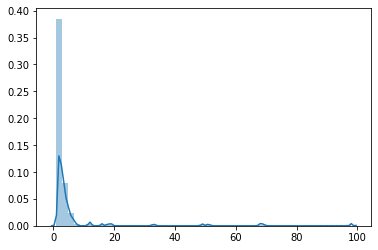

In [0]:
grados = H.degree()
#print(grados)
sns.distplot(list(dict(grados).values()))


# **Referencias**

[1] http://tejedoresdelweb.com/w/Redes_libres_de_escala

[2] https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/cluster.html#average_clustering

# **La red de divisibilidad de los números naturales**

In [0]:
def graph_num_natural(nodes: int):
    #nodes = 100
    H = nx.Graph()

    #print("numero de nodos: ",number_of_nodes(H))

    for i in range(1, nodes):
        for j in range(1, nodes):
            #n = i
            #m = j
            #divmod(m, n)
            #res = divmod(m, n)[1]
            if divmod(j, i)[1] == 0:
                H.add_edge(j, i)

    return H

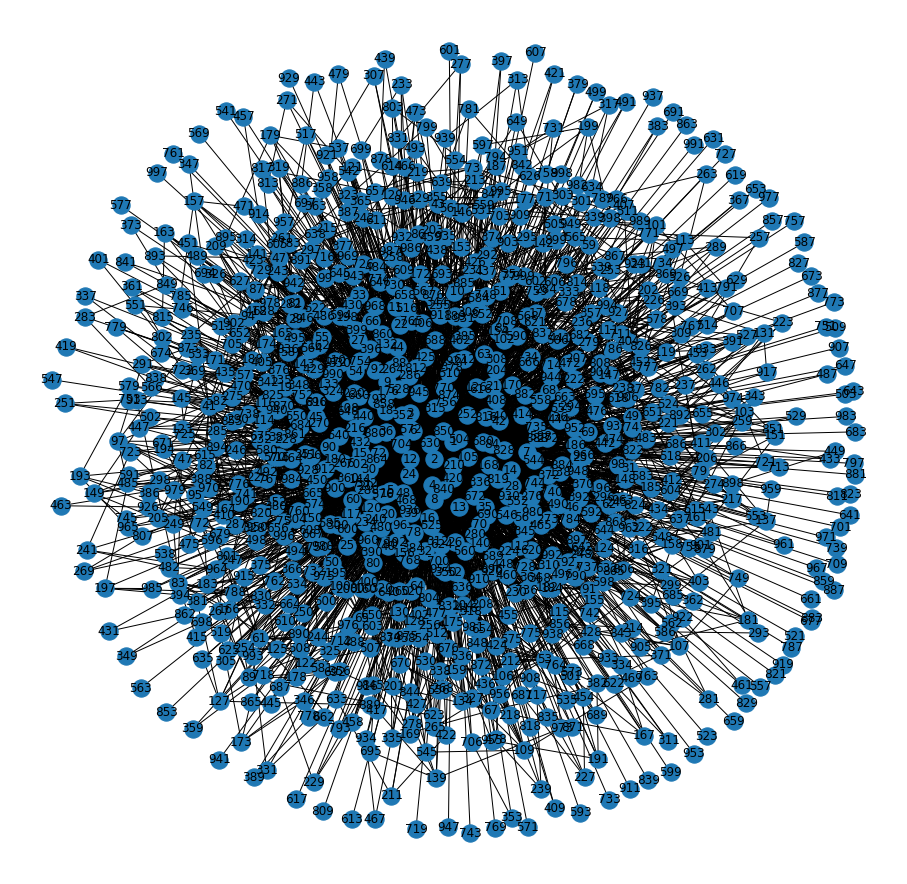

In [3]:
grafo = graph_num_natural(1000)
pos = nx.spring_layout(grafo)
fig, ax = plt.subplots(figsize=(16,16))
nx.draw(grafo,pos, ax=ax,with_labels=True)
fig.show()



In [4]:
print("nodos: ", len(grafo.nodes))
print("aristas: ", len(grafo.edges))
print("Distancia media: ", nx.average_shortest_path_length(grafo))
print("indice de agrupamiento: ", nx.average_clustering(grafo))
print(nx.is_connected(grafo))

nodos:  999
aristas:  7053
Distancia media:  1.987855591062004
indice de agrupamiento:  0.6072610127679938
True


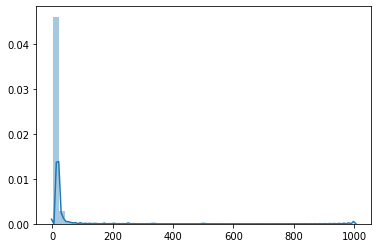

In [6]:
grados = grafo.degree()
#print(grados)
sns.distplot(list(dict(grados).values()))

# Referencia


[1] REDES ALEATORIAS, DE PEQUEÑOMUNDO Y LIBRES DE ESCALA, Pedro A. Solares Hernández. TRABAJO FINAL DE MASTER Máster en Investigación Matemática. Curso 2016/2017
